#  Dataset: House Prices - Advanced Regression Techniques

---

##  Objetivo del dataset
- **Meta principal**: **Predecir el precio de venta de una casa (`SalePrice`)** en la ciudad de Ames (Iowa, EE.UU.).
- **Cómo se logra**: mediante modelos de **regresión múltiple** u otros algoritmos de Machine Learning, usando como insumo las características de la casa (tamaño, materiales, condiciones, ubicación, etc.).

---

##  Pasos para llegar al objetivo
1. **Comprensión del problema**  
   - Variable dependiente: `SalePrice`.
   - Variables independientes: características estructurales, de ubicación, materiales y extras.

2. **Exploración de los datos (EDA)**  
   - Revisar registros, valores nulos, tipos de datos.
   - Generar estadísticas descriptivas y distribuciones.

3. **Limpieza de datos**  
   - Imputar o eliminar valores faltantes (`NA`).
   - Tratar valores atípicos.
   - Agrupar categorías poco frecuentes.

4. **Codificación de variables categóricas**  
   - Usar *One Hot Encoding* o *Label Encoding*.

5. **Escalamiento / Normalización**  
   - Aplicar sobre variables numéricas cuando el modelo lo requiera.

6. **Selección de variables relevantes**  
   - Usar correlaciones, ANOVA o técnicas de *feature selection*.

7. **Construcción del modelo**  
   - Empezar con **Regresión Lineal Múltiple**.
  

8. **Evaluación del modelo**  
- **RMSE (Root Mean Squared Error):** mide el error promedio, penaliza más los errores grandes.  
- **MAE (Mean Absolute Error):** error promedio absoluto entre lo real y lo predicho.  
- **R² (Coeficiente de determinación):** indica qué tan bien el modelo explica la variabilidad (0 a 1).  
- **Validación cruzada:** divide los datos en partes para entrenar y probar el modelo de forma más robusta.  


9. **Interpretación de resultados**  
   - Identificar qué variables influyen más en el precio de venta.

---

##  Resumen de variables principales
El dataset contiene **79 variables**. Algunos ejemplos clave:

- **Lote**
  - `MSSubClass`: tipo de vivienda (1 piso, 2 pisos, dúplex, PUD).  
  - `MSZoning`: zonificación (residencial, comercial, agrícola).  
  - `LotFrontage`: longitud de fachada.  
  - `LotArea`: área del terreno.  
  - `LotShape`: forma del lote (regular, irregular).  
  - `LandContour`: topografía (plano, pendiente, depresión).  
  - `Neighborhood`: barrio donde se ubica la casa.  

- **Construcción**
  - `BldgType`: tipo de construcción (unifamiliar, dúplex, townhouse).  
  - `HouseStyle`: estilo (1 piso, 2 pisos, split-level).  
  - `OverallQual`: calidad general (1 = muy mala, 10 = excelente).  
  - `OverallCond`: estado general de la vivienda.  
  - `YearBuilt`: año de construcción.  
  - `YearRemodAdd`: año de remodelación.  
  - `RoofStyle` / `RoofMatl`: tipo y material del techo.  
  - `Exterior1st` / `Exterior2nd`: material exterior.  

- **Sótano**
  - `BsmtQual`, `BsmtCond`: calidad y estado del sótano.  
  - `BsmtExposure`: exposición (ventanas, walkout).  
  - `TotalBsmtSF`: área total del sótano.  

- **Habitabilidad**
  - `GrLivArea`: área habitable sobre el nivel del suelo.  
  - `FullBath`, `HalfBath`: baños.  
  - `Bedroom`, `Kitchen`: habitaciones y cocinas.  
  - `TotRmsAbvGrd`: total de cuartos.  

- **Extras**
  - `Fireplaces`, `FireplaceQu`: chimeneas.  
  - `GarageType`, `GarageCars`, `GarageArea`: características del garaje.  
  - `WoodDeckSF`, `OpenPorchSF`, `PoolArea`, `Fence`: áreas exteriores y amenidades.  

- **Venta**
  - `MoSold`, `YrSold`: mes y año de venta.  
  - `SaleType`: tipo de venta (convencional, cash, VA loan).  
  - `SaleCondition`: condiciones de la venta (normal, familiar, parcial, etc.).  

- **Target**
  - `SalePrice`: precio de venta de la vivienda (variable a predecir).

---

##  En resumen
El dataset busca **explicar y predecir el precio de las casas** usando información estructural, de ubicación, calidad de materiales, extras y condiciones de venta.


## 1. Comprensión del problema e importación de librerías

In [110]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Librerías importadas correctamente")

Librerías importadas correctamente


## 2. Exploración de los datos (EDA)

In [111]:

datos_entrenamiento = pd.read_csv('train.csv')
datos_prueba = pd.read_csv('test.csv')

print(f"Datos de entrenamiento: {datos_entrenamiento.shape}")
print(f"Datos de prueba: {datos_prueba.shape}")
print(f"\nVariable objetivo (SalePrice) - Estadísticas:")
print(datos_entrenamiento['SalePrice'].describe())


print("\nPrimeras 3 filas del dataset de entrenamiento:")
datos_entrenamiento.head(3)

Datos de entrenamiento: (1460, 81)
Datos de prueba: (1459, 80)

Variable objetivo (SalePrice) - Estadísticas:
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Primeras 3 filas del dataset de entrenamiento:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [112]:

print("Información del Dataset:")
print(f"Total de registros: {len(datos_entrenamiento)}")
print(f"Total de variables: {len(datos_entrenamiento.columns)}")
print(f"\nTipos de datos:")
print(datos_entrenamiento.dtypes.value_counts())


print(f"\nVariables con valores nulos (Top 20):")
conteo_nulos = datos_entrenamiento.isnull().sum().sort_values(ascending=False)
porcentaje_nulos = (conteo_nulos / len(datos_entrenamiento) * 100).round(2)
datos_nulos = pd.DataFrame({'Valores Nulos': conteo_nulos, 'Porcentaje': porcentaje_nulos})
print(datos_nulos[datos_nulos['Valores Nulos'] > 0].head(20))

Información del Dataset:
Total de registros: 1460
Total de variables: 81

Tipos de datos:
object     43
int64      35
float64     3
Name: count, dtype: int64

Variables con valores nulos (Top 20):
              Valores Nulos  Porcentaje
PoolQC                 1453       99.52
MiscFeature            1406       96.30
Alley                  1369       93.77
Fence                  1179       80.75
MasVnrType              872       59.73
FireplaceQu             690       47.26
LotFrontage             259       17.74
GarageQual               81        5.55
GarageFinish             81        5.55
GarageType               81        5.55
GarageYrBlt              81        5.55
GarageCond               81        5.55
BsmtFinType2             38        2.60
BsmtExposure             38        2.60
BsmtCond                 37        2.53
BsmtQual                 37        2.53
BsmtFinType1             37        2.53
MasVnrArea                8        0.55
Electrical                1        0.07


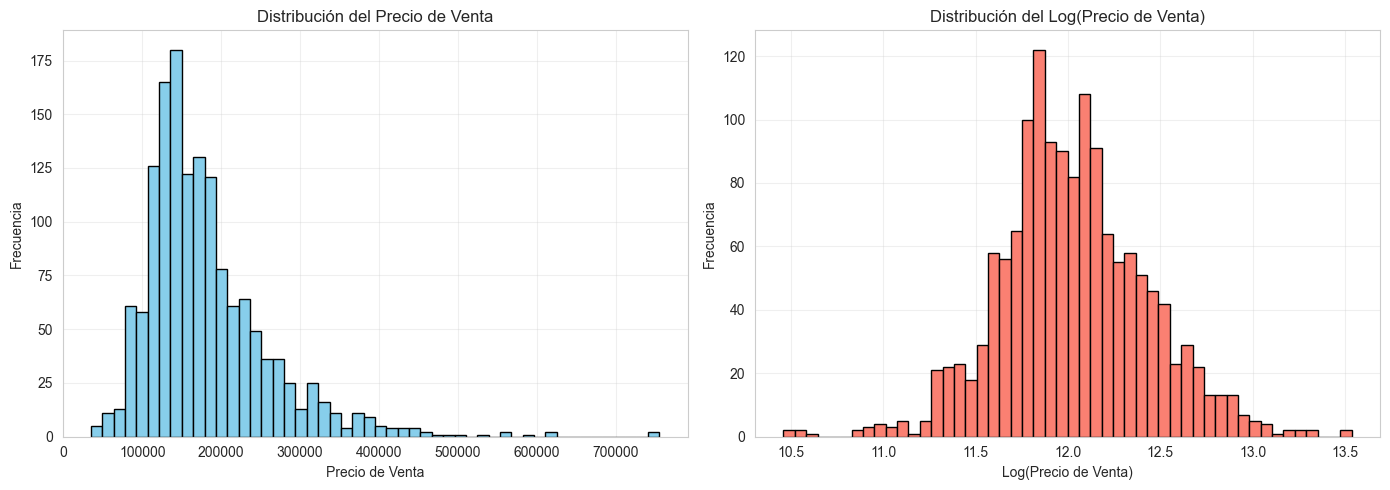

Asimetría del precio: 1.88
Curtosis del precio: 6.54


In [113]:

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(datos_entrenamiento['SalePrice'], bins=50, edgecolor='black', color='skyblue')
plt.xlabel('Precio de Venta')
plt.ylabel('Frecuencia')
plt.title('Distribución del Precio de Venta')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(np.log1p(datos_entrenamiento['SalePrice']), bins=50, edgecolor='black', color='salmon')
plt.xlabel('Log(Precio de Venta)')
plt.ylabel('Frecuencia')
plt.title('Distribución del Log(Precio de Venta)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Asimetría del precio: {datos_entrenamiento['SalePrice'].skew():.2f}")
print(f"Curtosis del precio: {datos_entrenamiento['SalePrice'].kurtosis():.2f}")

Top 15 variables más correlacionadas con SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64


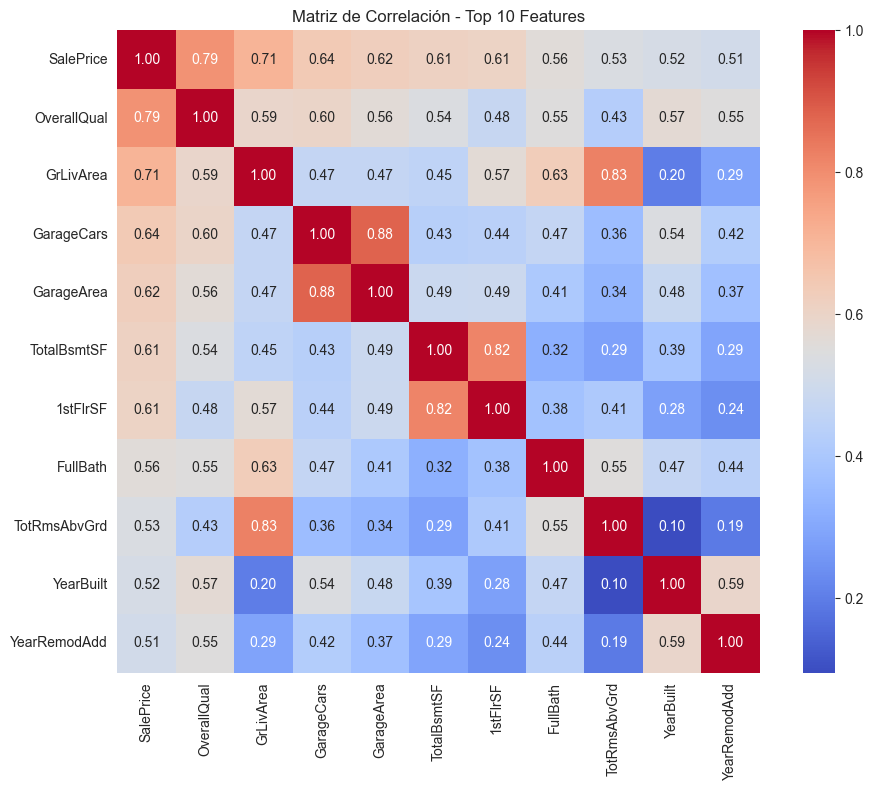

In [114]:

variables_numericas = datos_entrenamiento.select_dtypes(include=[np.number]).columns
correlaciones = datos_entrenamiento[variables_numericas].corr()['SalePrice'].sort_values(ascending=False)

print("Top 15 variables más correlacionadas con SalePrice:")
print(correlaciones.head(15))


plt.figure(figsize=(10, 8))
top_variables = correlaciones.head(11).index
sns.heatmap(datos_entrenamiento[top_variables].corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriz de Correlación - Top 10 Features')
plt.tight_layout()
plt.show()

## 3. Limpieza de datos

In [115]:

precios = datos_entrenamiento['SalePrice'].copy()
ids_test = datos_prueba['Id'].copy()

datos_entrenamiento = datos_entrenamiento.drop(['Id', 'SalePrice'], axis=1)
datos_prueba = datos_prueba.drop(['Id'], axis=1)

cantidad_train = datos_entrenamiento.shape[0]
todos_datos = pd.concat([datos_entrenamiento, datos_prueba], axis=0, ignore_index=True)

print(f"Dataset combinado: {todos_datos.shape}")
print(f"Registros de entrenamiento: {cantidad_train}")
print(f"Registros de prueba: {len(datos_prueba)}")

Dataset combinado: (2919, 79)
Registros de entrenamiento: 1460
Registros de prueba: 1459


In [116]:

columnas_numericas = todos_datos.select_dtypes(include=[np.number]).columns
for col in columnas_numericas:
    if todos_datos[col].isnull().sum() > 0:
        todos_datos[col].fillna(todos_datos[col].median(), inplace=True)

columnas_categoricas = todos_datos.select_dtypes(include=['object']).columns
for col in columnas_categoricas:
    if todos_datos[col].isnull().sum() > 0:
        todos_datos[col].fillna('None', inplace=True)

print(f"Valores nulos después de la imputación: {todos_datos.isnull().sum().sum()}")

indices_outliers = todos_datos[(todos_datos['GrLivArea'] > 4000)].index
if len(indices_outliers) > 0:
    print(f"Outliers detectados en GrLivArea: {len(indices_outliers)}")

Valores nulos después de la imputación: 0
Outliers detectados en GrLivArea: 5


## 4. Codificación de variables categóricas

In [117]:

columnas_categoricas = todos_datos.select_dtypes(include=['object']).columns
print(f"Variables categóricas: {len(columnas_categoricas)}")

datos_codificados = pd.get_dummies(todos_datos, columns=columnas_categoricas, drop_first=True)

print(f"Dataset después de One Hot Encoding: {datos_codificados.shape}")
print(f"Total de features: {datos_codificados.shape[1]}")

Variables categóricas: 43
Dataset después de One Hot Encoding: (2919, 267)
Total de features: 267


## 5. Escalamiento / Normalización

In [118]:

X_entrenamiento = datos_codificados[:cantidad_train].copy()
X_prueba = datos_codificados[cantidad_train:].copy()

print(f"X_entrenamiento: {X_entrenamiento.shape}")
print(f"precios: {precios.shape}")
print(f"X_prueba: {X_prueba.shape}")

X_entrenamiento: (1460, 267)
precios: (1460,)
X_prueba: (1459, 267)


In [119]:

escalador = StandardScaler()
X_entrenamiento_escalado = escalador.fit_transform(X_entrenamiento)
X_prueba_escalado = escalador.transform(X_prueba)

print(f"Datos escalados correctamente")
print(f"Shape X_entrenamiento_escalado: {X_entrenamiento_escalado.shape}")
print(f"Shape X_prueba_escalado: {X_prueba_escalado.shape}")

Datos escalados correctamente
Shape X_entrenamiento_escalado: (1460, 267)
Shape X_prueba_escalado: (1459, 267)


## 5. Escalamiento / Normalización

In [120]:

print(f"Variables categóricas: {len(columnas_categoricas)}")

datos_codificados = pd.get_dummies(todos_datos, columns=columnas_categoricas, drop_first=True)

print(f"Dataset después de One Hot Encoding: {datos_codificados.shape}")
print(f"Total de features: {datos_codificados.shape[1]}")

Variables categóricas: 43
Dataset después de One Hot Encoding: (2919, 267)
Total de features: 267


## 6. Selección de variables relevantes

In [121]:

print(f"Total de features seleccionadas: {datos_codificados.shape[1]}")
print("Variables con mayor correlación con SalePrice ya fueron identificadas en EDA")

Total de features seleccionadas: 267
Variables con mayor correlación con SalePrice ya fueron identificadas en EDA


## 7. Construcción del modelo

In [122]:

X_entren, X_validacion, y_entren, y_validacion = train_test_split(
    X_entrenamiento_escalado, precios, test_size=0.2, random_state=42
)

print(f"Conjunto de entrenamiento: {X_entren.shape}")
print(f"Conjunto de validación: {X_validacion.shape}")

modelo = LinearRegression()
print("\nEntrenando el modelo de Regresión Lineal")
modelo.fit(X_entren, y_entren)
print("Modelo entrenado correctamente")

Conjunto de entrenamiento: (1168, 267)
Conjunto de validación: (292, 267)

Entrenando el modelo de Regresión Lineal
Modelo entrenado correctamente


## 8. Evaluación del modelo

In [123]:

predicciones_train = modelo.predict(X_entren)
predicciones_validacion = modelo.predict(X_validacion)

rmse_entrenamiento = np.sqrt(mean_squared_error(y_entren, predicciones_train))
rmse_validacion = np.sqrt(mean_squared_error(y_validacion, predicciones_validacion))
mae_entrenamiento = mean_absolute_error(y_entren, predicciones_train)
mae_validacion = mean_absolute_error(y_validacion, predicciones_validacion)
r2_entrenamiento = r2_score(y_entren, predicciones_train)
r2_validacion = r2_score(y_validacion, predicciones_validacion)

print("MÉTRICAS DE EVALUACIÓN DEL MODELO")
print("="*50)
print(f"\nConjunto de Entrenamiento:")
print(f"   RMSE: ${rmse_entrenamiento:,.2f}")
print(f"   MAE:  ${mae_entrenamiento:,.2f}")
print(f"   R²:   {r2_entrenamiento:.4f}")

print(f"\nConjunto de Validación:")
print(f"   RMSE: ${rmse_validacion:,.2f}")
print(f"   MAE:  ${mae_validacion:,.2f}")
print(f"   R²:   {r2_validacion:.4f}")

MÉTRICAS DE EVALUACIÓN DEL MODELO

Conjunto de Entrenamiento:
   RMSE: $18,904.01
   MAE:  $12,112.05
   R²:   0.9401

Conjunto de Validación:
   RMSE: $83,090.77
   MAE:  $23,929.58
   R²:   0.0999


## 9. Interpretación de resultados

In [124]:

predicciones_train = modelo.predict(X_entren)
predicciones_validacion = modelo.predict(X_validacion)

rmse_entrenamiento = np.sqrt(mean_squared_error(y_entren, predicciones_train))
rmse_validacion = np.sqrt(mean_squared_error(y_validacion, predicciones_validacion))
mae_entrenamiento = mean_absolute_error(y_entren, predicciones_train)
mae_validacion = mean_absolute_error(y_validacion, predicciones_validacion)
r2_entrenamiento = r2_score(y_entren, predicciones_train)
r2_validacion = r2_score(y_validacion, predicciones_validacion)

print("MÉTRICAS DE EVALUACIÓN DEL MODELO")
print("="*50)
print(f"\nConjunto de Entrenamiento:")
print(f"   RMSE: ${rmse_entrenamiento:,.2f}")
print(f"   MAE:  ${mae_entrenamiento:,.2f}")
print(f"   R²:   {r2_entrenamiento:.4f}")

print(f"\nConjunto de Validación:")
print(f"   RMSE: ${rmse_validacion:,.2f}")
print(f"   MAE:  ${mae_validacion:,.2f}")
print(f"   R²:   {r2_validacion:.4f}")


print(f"\nInterpretación:")
print(f"   - El modelo explica el {r2_validacion*100:.2f}% de la variabilidad del precio")
print(f"   - Error promedio de predicción: ${mae_validacion:,.2f}")

MÉTRICAS DE EVALUACIÓN DEL MODELO

Conjunto de Entrenamiento:
   RMSE: $18,904.01
   MAE:  $12,112.05
   R²:   0.9401

Conjunto de Validación:
   RMSE: $83,090.77
   MAE:  $23,929.58
   R²:   0.0999

Interpretación:
   - El modelo explica el 9.99% de la variabilidad del precio
   - Error promedio de predicción: $23,929.58


In [125]:

puntajes_cv = cross_val_score(modelo, X_entrenamiento_escalado, precios, cv=5, scoring='neg_root_mean_squared_error')
puntajes_cv = -puntajes_cv  
print(f"\nVALIDACIÓN CRUZADA (5-Fold):")
print(f"   RMSE promedio: ${puntajes_cv.mean():,.2f}")
print(f"   Desviación estándar: ${puntajes_cv.std():,.2f}")
print(f"   Scores individuales: {[f'${s:,.2f}' for s in puntajes_cv]}")


VALIDACIÓN CRUZADA (5-Fold):
   RMSE promedio: $42,174.09
   Desviación estándar: $14,006.86
   Scores individuales: ['$65,882.60', '$34,040.98', '$40,850.98', '$23,880.90', '$46,214.97']


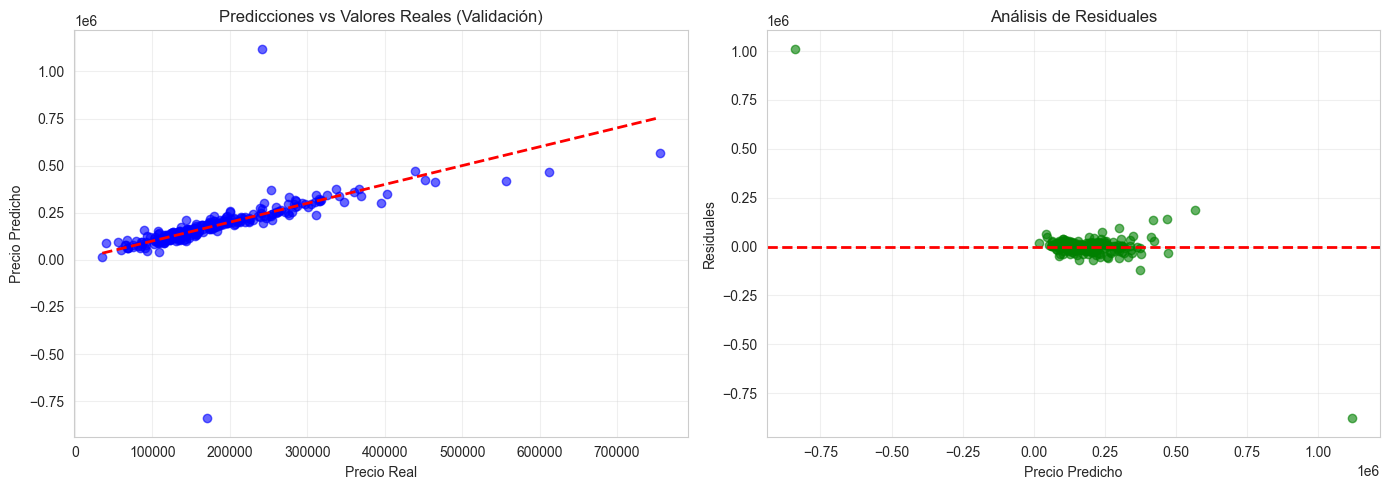

In [126]:

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_validacion, predicciones_validacion, alpha=0.6, color='blue')
plt.plot([y_validacion.min(), y_validacion.max()], [y_validacion.min(), y_validacion.max()], 'r--', lw=2)
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Predicciones vs Valores Reales (Validación)')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
residuos = y_validacion - predicciones_validacion
plt.scatter(predicciones_validacion, residuos, alpha=0.6, color='green')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Precio Predicho')
plt.ylabel('Residuales')
plt.title('Análisis de Residuales')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Generación de predicciones finales

In [127]:

print("Entrenando modelo final con todos los datos de entrenamiento...")
modelo_final = LinearRegression()
modelo_final.fit(X_entrenamiento_escalado, precios)

predicciones_finales = modelo_final.predict(X_prueba_escalado)

print(f"Predicciones generadas: {len(predicciones_finales)}")
print(f"\nEstadísticas de las predicciones:")
print(f"   Precio mínimo predicho: ${predicciones_finales.min():,.2f}")
print(f"   Precio máximo predicho: ${predicciones_finales.max():,.2f}")
print(f"   Precio promedio predicho: ${predicciones_finales.mean():,.2f}")
print(f"   Mediana de precios predichos: ${np.median(predicciones_finales):,.2f}")

Entrenando modelo final con todos los datos de entrenamiento...
Predicciones generadas: 1459

Estadísticas de las predicciones:
   Precio mínimo predicho: $7,149.25
   Precio máximo predicho: $702,321.95
   Precio promedio predicho: $179,713.78
   Mediana de precios predichos: $161,174.74


## Archivo de entrega

In [ ]:

resultado_final = pd.DataFrame({
    'Id': ids_test,
    'SalePrice': predicciones_finales
})

# Guardar en CSV
resultado_final.to_csv('predicciones.csv', index=False)

print("Archivo 'predicciones.csv' generado con éxito ✅")
print(f"\nPrimeras 10 predicciones:")
print(resultado_final.head(10))

print(f"\nTotal de predicciones : {len(resultado_final)}")

Archivo 'predicciones.csv' generado con éxito ✅

Primeras 10 predicciones:
     Id      SalePrice
0  1461  112624.267663
1  1462  159737.946364
2  1463  186516.873482
3  1464  197154.612159
4  1465  205458.830827
5  1466  170109.889009
6  1467  174914.631297
7  1468  156537.396320
8  1469  212404.480892
9  1470  114814.724339

Total de predicciones : 1459
